In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
... 'python-machine-learning-book-3rd-edition'
... '/master/ch10/housing.data.txt',
... header=None,
... sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
... 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
... 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/cr/wgr_cfzd63x5rjlv07yzf61c0000gn/T/ipykernel_62959/60973219.py:5: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


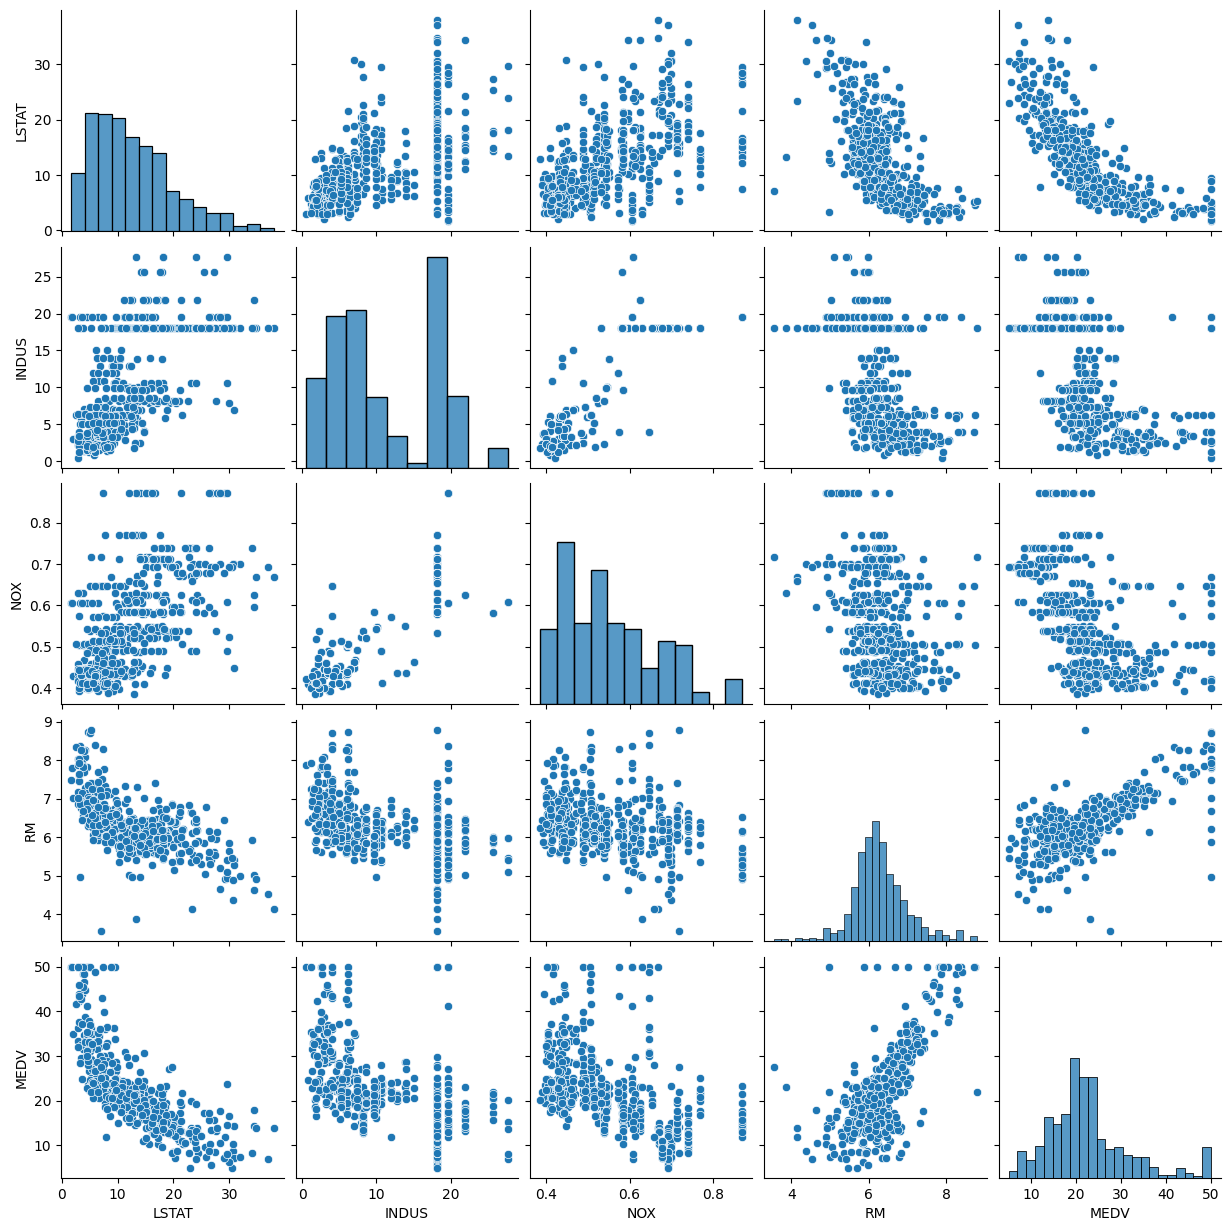

In [ ]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols])

<Axes: >

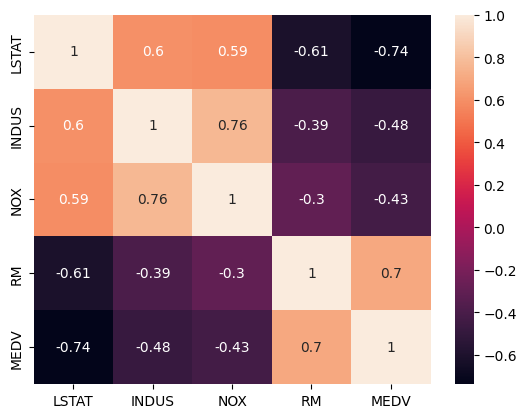

In [19]:
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, annot=True, xticklabels=cols, yticklabels=cols)

### Model housing prices against room numbers

In [31]:
%run Linear_Regression_GD.ipynb LinearRegressionGD

X = df[['RM']].values
y = df[['MEDV']].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)


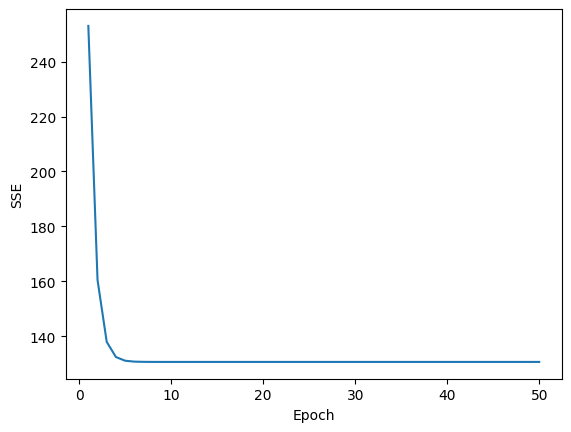

In [33]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel("SSE")
plt.xlabel("Epoch")
plt.show()


In [38]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor = 'white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

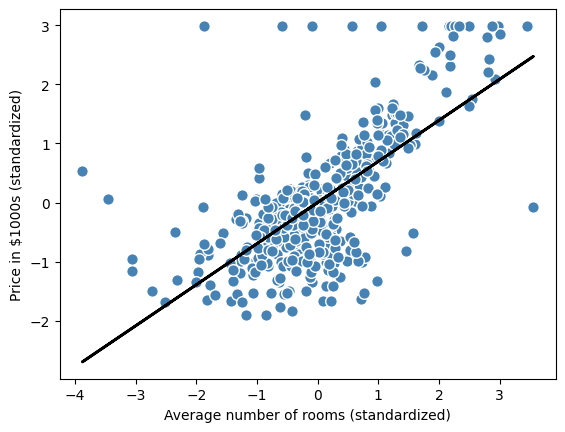

In [39]:
lin_regplot(X_std, y_std, lr)
plt.xlabel("Average number of rooms (standardized)")
plt.ylabel("Price in $1000s (standardized)")
plt.show()

### Model housing prices against `LSTAT`

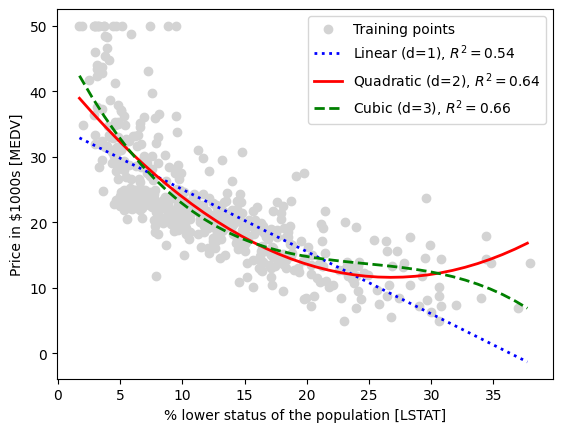

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()
# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)
# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))
# plot
plt.scatter(X, y, label='Training points', color='lightgray')
plt.plot(X_fit, y_lin_fit,
label='Linear (d=1), $R^2=%.2f$' % linear_r2,
color='blue',
lw=2,
linestyle=':')
plt.plot(X_fit, y_quad_fit,
label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
color='red',
lw=2,
linestyle='-')
plt.plot(X_fit, y_cubic_fit,
label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
color='green',
lw=2,
linestyle='--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.show()

<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/var/folders/cr/wgr_cfzd63x5rjlv07yzf61c0000gn/T/ipykernel_62959/1696214462.py:19: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')


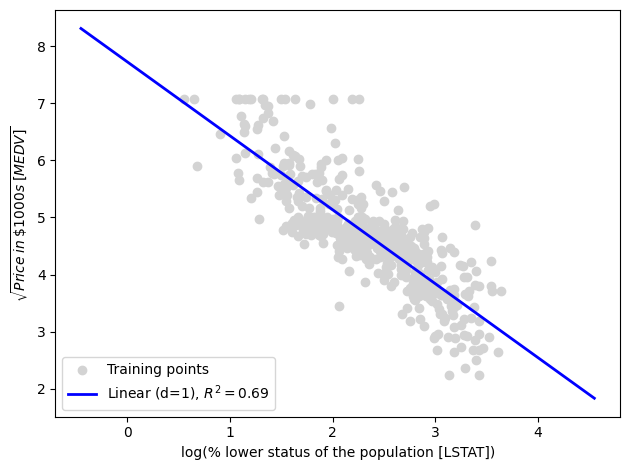

In [45]:
# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)
# fit features
X_fit = np.arange(X_log.min()-1,
X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))
# plot results
plt.scatter(X_log, y_sqrt,
label='Training points',
color='lightgray')
plt.plot(X_fit, y_lin_fit,
label='Linear (d=1), $R^2=%.2f$' % linear_r2,
color='blue',
lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()